In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [2]:
data = pd.read_csv("data.csv",index_col=0)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [3]:
#one hot encoding
data=pd.get_dummies(data,columns=['location','country'])
data.shape

(863, 185)

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.head()

,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_20,location_21,location_22,location_23,location_24,location_25,location_26,location_27,location_28,location_29,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_40,location_41,location_42,location_43,location_44,location_45,location_46,location_47,location_48,location_49,location_50,location_51,location_52,location_53,location_54,location_55,location_56,location_57,location_58,location_59,location_60,location_61,location_62,location_63,location_64,location_65,location_66,location_67,location_68,location_69,location_70,location_71,location_72,location_73,location_74,location_75,location_76,location_77,location_78,location_79,location_80,location_81,location_82,location_83,location_84,location_85,location_86,location_87,location_88,location_89,location_90,location_91,location_92,location_93,location_94,location_95,location_96,location_97,location_98,location_99,location_100,location_101,location_102,location_103,location_104,location_105,location_106,location_107,location_108,location_109,location_110,location_111,location_112,location_113,location_114,location_115,location_116,location_117,location_118,location_119,location_120,location_121,location_122,location_123,location_124,location_125,location_126,location_127,location_128,location_129,location_130,location_131,location_132,location_133,location_134,location_135,location_136,location_137,location_138,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,country_17,country_18,country_19,country_20,country_21,country_22,country_23,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,1,66.0,1,0,14,31,19,12,3,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,56.0,0,1,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,14,31,19,12,3,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,14,31,19,12,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
data2 = data.columns.tolist()
data2 = data2[12:186] + data2[0:12]
data=data[data2]
pd.set_option("display.max_rows", None, "display.max_columns", None)
data.head()


,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,location_10,location_11,location_12,location_13,location_14,location_15,location_16,location_17,location_18,location_19,location_20,location_21,location_22,location_23,location_24,location_25,location_26,location_27,location_28,location_29,location_30,location_31,location_32,location_33,location_34,location_35,location_36,location_37,location_38,location_39,location_40,location_41,location_42,location_43,location_44,location_45,location_46,location_47,location_48,location_49,location_50,location_51,location_52,location_53,location_54,location_55,location_56,location_57,location_58,location_59,location_60,location_61,location_62,location_63,location_64,location_65,location_66,location_67,location_68,location_69,location_70,location_71,location_72,location_73,location_74,location_75,location_76,location_77,location_78,location_79,location_80,location_81,location_82,location_83,location_84,location_85,location_86,location_87,location_88,location_89,location_90,location_91,location_92,location_93,location_94,location_95,location_96,location_97,location_98,location_99,location_100,location_101,location_102,location_103,location_104,location_105,location_106,location_107,location_108,location_109,location_110,location_111,location_112,location_113,location_114,location_115,location_116,location_117,location_118,location_119,location_120,location_121,location_122,location_123,location_124,location_125,location_126,location_127,location_128,location_129,location_130,location_131,location_132,location_133,location_134,location_135,location_136,location_137,location_138,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10,country_11,country_12,country_13,country_14,country_15,country_16,country_17,country_18,country_19,country_20,country_21,country_22,country_23,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,66.0,1,0,14,31,19,12,3,1,8,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.0,0,1,14,31,19,12,3,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46.0,0,1,14,31,19,12,3,1,13,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,1,0,14,31,19,12,3,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [6]:
x=data.iloc[:,0:184].values
y=data.iloc[:,184].values


In [7]:
#normalization
st_x= StandardScaler()
x= st_x.fit_transform(x)

In [8]:
#feature selection
x = SelectKBest(score_func=f_classif, k=12).fit_transform(x,y)
#x = test.fit(x, y)

In [9]:
from sklearn.model_selection import train_test_split
#spiliting data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3) 


# Entropy Decision Tree

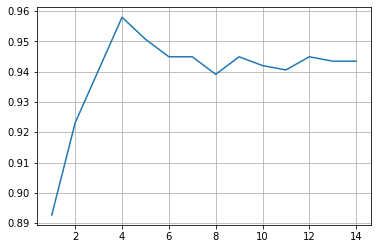

best_K = 4 


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#Decision Tree
scores = []
# finding the best K that gives the best score on the validation set
for k in range(1,15):
    #create a DT model using ENTROPY
    DT_cv = DecisionTreeClassifier(criterion="entropy",max_depth=k,random_state=42)

    #train model with cv of 10 
    cv_score = cross_val_score(DT_cv, x_train, y_train, cv=10)
    scores.append(np.mean(cv_score))

plt.plot(range(1,15),scores)
plt.grid()
plt.show()

best_K = scores.index(max(scores)) + 1
print(f"{best_K = } ")

In [11]:
DTclass=DecisionTreeClassifier(criterion="entropy",max_depth=best_K,random_state=42)
DTclass.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [12]:
y_predict=DTclass.predict(x_test)

In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#tn fp 
#fn tp
print(confusion_matrix(y_test, y_predict))

[[149   6]
 [  4  14]]


In [14]:
from sklearn.metrics import precision_score
#precision=tp/(tp+fp)
precision = precision_score(y_test, y_predict, average='binary')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
#recall=tp/(tp+fn)
recall = recall_score(y_test, y_predict,average='binary')
print('Recall:%.3f'%recall)
from sklearn.metrics import f1_score
#score=(2*precision*recall)/(precision+recall)
score = f1_score(y_test, y_predict)
print('Score:%.3f'%score)

Precision: 0.700
Recall:0.778
Score:0.737


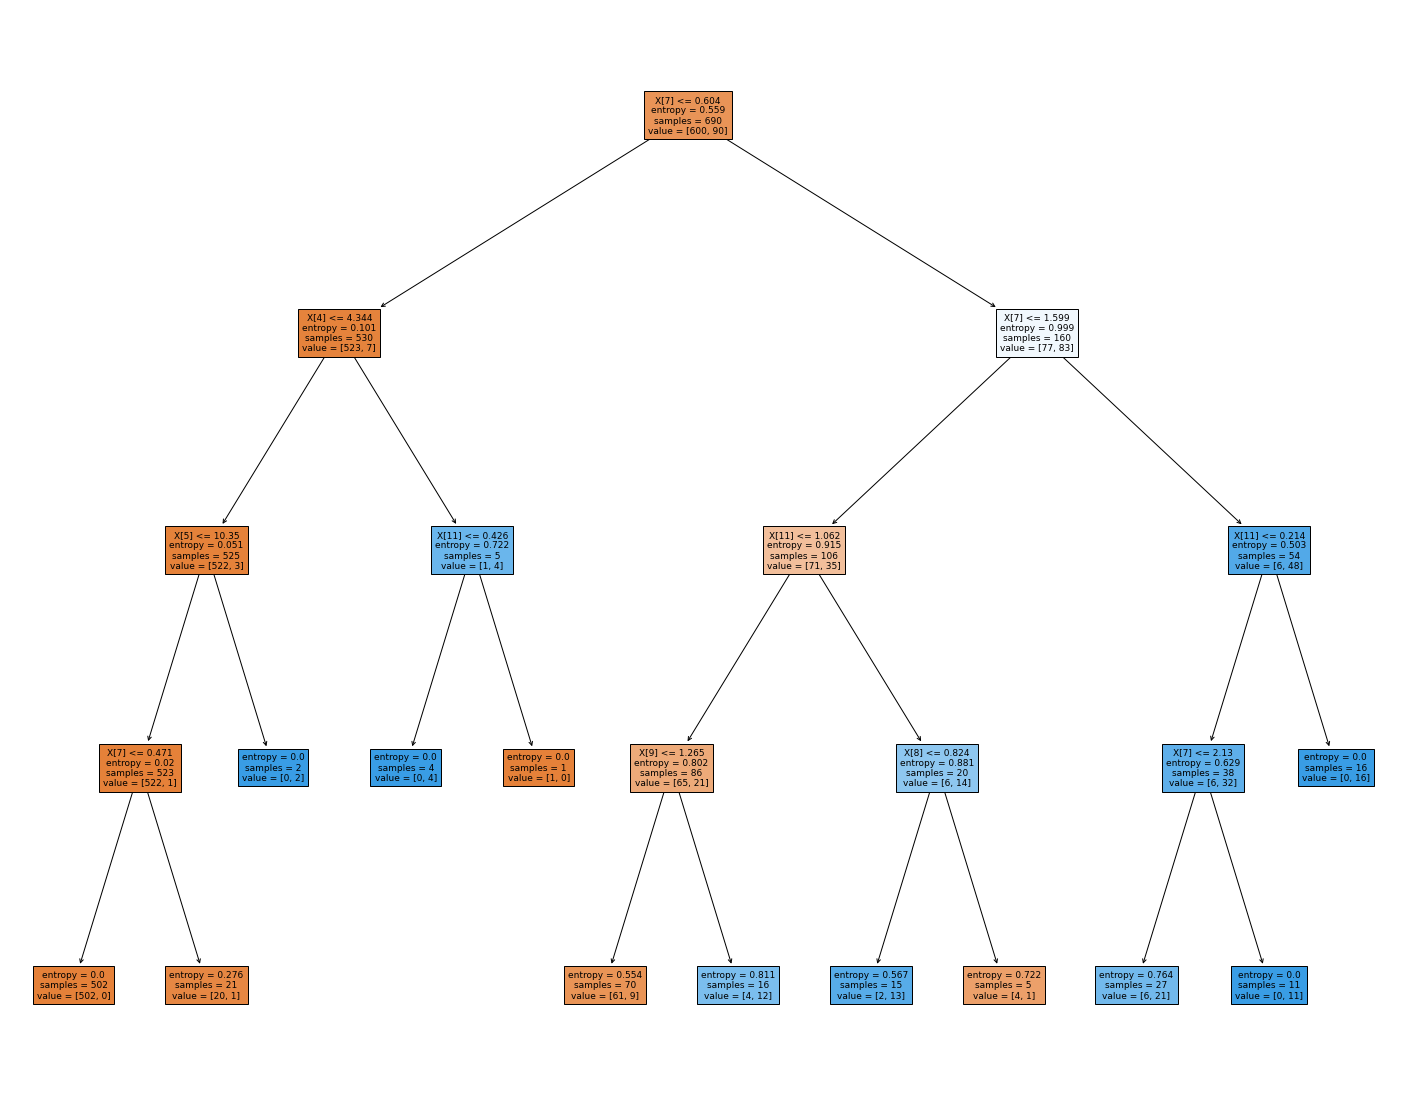

In [15]:
from sklearn import tree
#decision tree graph
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(DTclass, max_depth = 5,fontsize=9,
                   filled=True)
fig.savefig("decistion_tree.png")

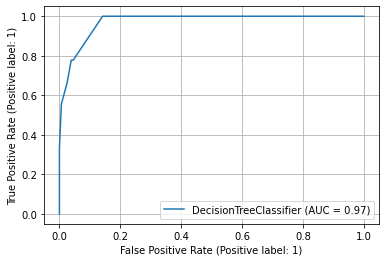

In [16]:
from sklearn.metrics import plot_roc_curve
# ROC curve 
plot_roc_curve(DTclass, x_test, y_test)
plt.grid()

# GINI Descision Tree


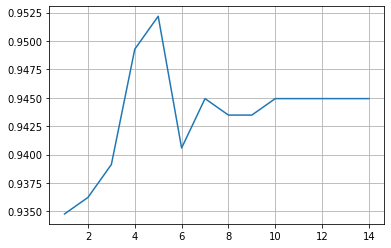

best_K = 5 


In [17]:
#Decision Tree
scores = []
# finding the best K that gives the best score on the validation set
for k in range(1,15):
    #create a DT model using GINI
    DT1_cv = DecisionTreeClassifier(criterion="gini",max_depth=k,random_state=42)

    #train model with cv of 10 
    cv_score = cross_val_score(DT1_cv, x_train, y_train, cv=10)
    scores.append(np.mean(cv_score))

plt.plot(range(1,15),scores)
plt.grid()
plt.show()

best_K = scores.index(max(scores)) + 1
print(f"{best_K = } ")


In [18]:
DT1class=DecisionTreeClassifier(criterion="gini",max_depth=best_K,random_state=42)
DT1class.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [19]:
y_predict=DT1class.predict(x_test)

In [20]:
#confusion matrix
#tn fp 
#fn tp
print(confusion_matrix(y_test, y_predict))

[[145  10]
 [  1  17]]


In [21]:
#precision=tp/(tp+fp)
precision = precision_score(y_test, y_predict, average='binary')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
#recall=tp/(tp+fn)
recall = recall_score(y_test, y_predict,average='binary')
print('Recall:%.3f'%recall)
from sklearn.metrics import f1_score
#score=(2*precision*recall)/(precision+recall)
score = f1_score(y_test, y_predict)
print('Score:%.3f'%score)

Precision: 0.630
Recall:0.944
Score:0.756


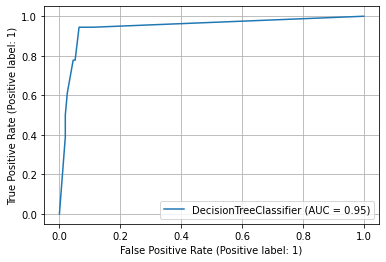

In [22]:
# ROC curve 
plot_roc_curve(DT1class, x_test, y_test)
plt.grid()

# SVM

In [23]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=3) 


In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#SVM parameter selection using grid search cross validation to find the best parameters
SVMparameters={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','poly','rbf','sigmoid']}
SVMclass = GridSearchCV(SVC(), SVMparameters, refit = True, verbose = 3)
SVMclass.fit(x_train, y_train)
y_pred = SVMclass.predict(x_test)
print(SVMclass.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma

[CV 2/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ......................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .......................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END .....................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ......................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=100, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=100, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 2/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 3/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 4/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 5/5] END .................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.5s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.2s
[CV 5/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   1.0s
[CV 1/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............

In [25]:
#confusion matrix
#tn fp 
#fn tp
print(confusion_matrix(y_test, y_pred))

[[150   5]
 [  6  12]]


In [26]:
#precision=tp/(tp+fp)
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % precision)
#recall=tp/(tp+fn)
recall = recall_score(y_test, y_pred,average='binary')
print('Recall:%.3f'%recall)
#score=(2*precision*recall)/(precision+recall)
score = f1_score(y_test, y_pred)
print('Score:%.3f'%score)

Precision: 0.706
Recall:0.667
Score:0.686


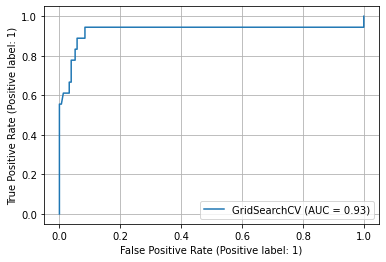

In [27]:
# ROC curve 
plot_roc_curve(SVMclass, x_test, y_test)
plt.grid()